In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import *

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [3]:
COLUMNS = [
'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']

filtered_df = df[COLUMNS]

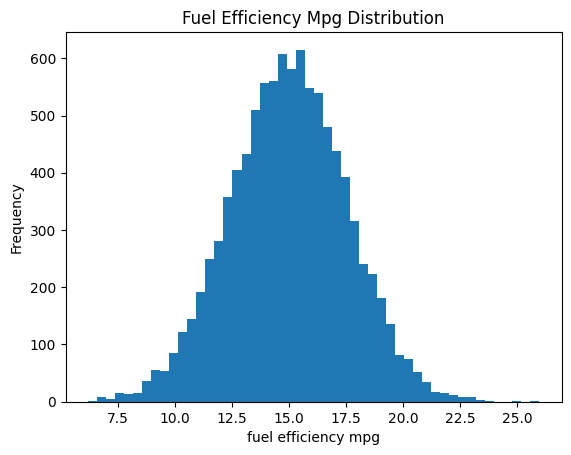

In [4]:
ax = filtered_df['fuel_efficiency_mpg'].plot(kind='hist', bins=50)
ax.set_title('Fuel Efficiency Mpg Distribution')
ax.set_xlabel('fuel efficiency mpg')
plt.show()

In [5]:
# Q1
filtered_df.isna().sum().idxmax()

'horsepower'

In [6]:
# Q2
print(filtered_df['horsepower'].median())

149.0


In [7]:
# Split data in train/val/test sets, with 60%/20%/20% distribution.
n = len(df)
n_val = int(round(0.20 * n))
n_test = int(round(0.20 * n))
n_train = n - n_val - n_test

np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

idx_train = idx[:n_train]
idx_val = idx[n_train:n_train + n_val]
idx_test = idx[n_train + n_val:]

df_train = filtered_df.iloc[idx_train].copy()
df_val = filtered_df.iloc[idx_val].copy()
df_test = filtered_df.iloc[idx_test].copy()

# reset indices
for part in (df_train, df_val, df_test):
    part.reset_index(drop=True, inplace=True)

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

for part in (df_train, df_val, df_test):
    del part['fuel_efficiency_mpg']

In [8]:
# fill missing values with 0, then train model
df_train_0_fill = df_train.copy()
df_val_0_fill = df_val.copy()
df_test_0_fill = df_test.copy()
for part in (df_train_0_fill, df_val_0_fill, df_test_0_fill):
    part['horsepower'] = part['horsepower'].fillna(0)

X_train_0_fill = df_train_0_fill.values
X_val_0_fill = df_val_0_fill.values
w0, w = train_linear_regression_normal(X_train_0_fill, y_train)
y_pred = predict_linear(X_val_0_fill, w0, w)
print(f'RMSE (missing values filled with 0): {round(rmse(y_val, y_pred), 2)}')

RMSE (missing values filled with 0): 0.52


In [9]:
# fill missing values with mean, then train model
horsepower_mean = df_train['horsepower'].mean()
df_train_mean_fill = df_train.copy()
df_val_mean_fill = df_val.copy()
df_test_mean_fill = df_test.copy()
for part in (df_train_mean_fill, df_val_mean_fill, df_test_mean_fill):
    part['horsepower'] = part['horsepower'].fillna(horsepower_mean)
X_train_mean_fill = df_train_mean_fill.values
X_val_mean_fill = df_val_mean_fill.values
w0, w = train_linear_regression_normal(X_train_mean_fill, y_train)
y_pred = predict_linear(X_val_mean_fill, w0, w)
print(f'RMSE (missing values filled with mean): {round(rmse(y_val, y_pred), 2)}')

RMSE (missing values filled with mean): 0.46


In [10]:
# Q3
# fill horsepower with mean gives better RMSE

In [11]:
# Q4
# train a regularized linear regression

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = []

X_train = df_train_0_fill.values
X_val = df_val_0_fill.values

for r in r_values:
    w0, w = train_regularized_linear_regression(X_train, y_train, r)
    y_pred = predict_linear(X_val, w0, w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(round(score, 2))
    print(f'RMSE with r={r}: {score}')


best_score = min(rmse_scores)
best_indices = [i for i, score in enumerate(rmse_scores) if score == best_score]
best_r = r_values[min(best_indices)]  # If multiple have the same score, choose the smallest r

print(f"\nBest r value: {best_r} with RMSE: {best_score}")

RMSE with r=0: 0.517059224888318
RMSE with r=0.01: 0.5170592248960598
RMSE with r=0.1: 0.5170592249655407
RMSE with r=1: 0.5170592256604366
RMSE with r=5: 0.5170592287487815
RMSE with r=10: 0.5170592326091936
RMSE with r=100: 0.5170593020892393

Best r value: 0 with RMSE: 0.52


In [12]:
# Q5
# Try different seed values and calculate the standard deviation of RMSE scores

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Split data with the current seed
    n = len(df)
    n_val = int(round(0.20 * n))
    n_test = int(round(0.20 * n))
    n_train = n - n_val - n_test

    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    idx_train = idx[:n_train]
    idx_val = idx[n_train:n_train + n_val]
    idx_test = idx[n_train + n_val:]

    df_train = filtered_df.iloc[idx_train].copy()
    df_val = filtered_df.iloc[idx_val].copy()
    df_test = filtered_df.iloc[idx_test].copy()

    # Reset indices
    for part in (df_train, df_val, df_test):
        part.reset_index(drop=True, inplace=True)

    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values

    for part in (df_train, df_val, df_test):
        del part['fuel_efficiency_mpg']
    
    # Fill missing values with 0
    df_train_0 = df_train.copy()
    df_val_0 = df_val.copy()
    df_test_0 = df_test.copy()
    
    for part in (df_train_0, df_val_0, df_test_0):
        part['horsepower'] = part['horsepower'].fillna(0)
    
    # Train model without regularization
    X_train_0 = df_train_0.values
    X_val_0 = df_val_0.values
    
    w0, w = train_linear_regression_normal(X_train_0, y_train)
    y_pred = predict_linear(X_val_0, w0, w)
    
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    
    print(f'Seed {seed}, RMSE: {round(score, 3)}')

# Calculate the standard deviation of the scores
std = np.std(rmse_scores)
print(f'\nStandard Deviation of RMSE scores: {round(std, 3)}')

Seed 0, RMSE: 0.521
Seed 1, RMSE: 0.522
Seed 2, RMSE: 0.523
Seed 3, RMSE: 0.516
Seed 4, RMSE: 0.511
Seed 5, RMSE: 0.529
Seed 6, RMSE: 0.532
Seed 7, RMSE: 0.509
Seed 8, RMSE: 0.515
Seed 9, RMSE: 0.513

Standard Deviation of RMSE scores: 0.007


In [16]:
# Q6
# Split data with seed 9
np.random.seed(9)
n = len(df)
n_val = int(round(0.20 * n))
n_test = int(round(0.20 * n))
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

idx_train = idx[:n_train]
idx_val = idx[n_train:n_train + n_val]
idx_test = idx[n_train + n_val:]

# Extract the datasets
df_train = filtered_df.iloc[idx_train].copy()
df_val = filtered_df.iloc[idx_val].copy()
df_test = filtered_df.iloc[idx_test].copy()

# Reset indices
for part in (df_train, df_val, df_test):
    part.reset_index(drop=True, inplace=True)

# Extract target values
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

# Remove target from features
for part in (df_train, df_val, df_test):
    del part['fuel_efficiency_mpg']

# Combine train and validation datasets
df_train_val = pd.concat([df_train, df_val], ignore_index=True)
y_train_val = np.concatenate([y_train, y_val])

# Fill missing values with 0
df_train_val_0 = df_train_val.copy()
df_test_0 = df_test.copy()
for part in (df_train_val_0, df_test_0):
    part['horsepower'] = part['horsepower'].fillna(0)

# Convert to numpy arrays
X_train_val = df_train_val_0.values
X_test = df_test_0.values

# Train regularized model with r=0.001
w0, w = train_regularized_linear_regression(X_train_val, y_train_val, r=0.001)

# Predict on test data and calculate RMSE
y_pred = predict_linear(X_test, w0, w)
test_rmse = rmse(y_test, y_pred)

print(f'RMSE on test dataset with r=0.001: {round(test_rmse, 3)}')

RMSE on test dataset with r=0.001: 0.516
